# Introduction to Machine Learning - Dimensionality reduction

The data we collect often lives in a very high dimensional space. Examples include storing each pixel of an image, the movie preferences of each individual, or even a 500 dimensional feature vector describing a whiskey. 

The aim of dimensionality reduction is two-fold:
* Understanding the important features (and indeed, combination thereof) of the data
* Getting rid of variability that could have been caused by random process

<br>
In this tutorial we aim to examine a number of widely used algorithms for dimensionality reduction, as well as some more involved techniques. Implementing these algorithms using only linear algebraic operations drives a better understanding of how parameters affect the outcomes of algorithms and how mistakes may be committed, that affect subsequent analyses.

<b><u>Table of contents</u></b>

<a href='#pca'>Principle Component Analysis (PCA)</a>

<a href='#mds'>Multidimensional Scaling (MDS)</a>

<a href='#lle'>Locally Linear Embedding (LLE)</a>

<a href='#isomap'>Isomap</a>

<a href='#further'>Further algorithms</a>
* ICA, MVU, SNE

<a href='#yours'>Try your own data and algorithms</a>


In [1]:
# Toolboxes used
import numpy as np # For linear algebra
import scipy.io # For loading matlab datasets
from sklearn import decomposition as decomp # PCA-like methods
from sklearn import manifold # Manifold-based methods
from sklearn import neighbors

import matplotlib # Matlab style plotting package for python
import matplotlib.pyplot as plt
%matplotlib notebook
np.set_printoptions(precision=3)

import dimred_funcs as df # Importing the custom subfunctions from a separate file

In [2]:
# Loading an example dataset
X = scipy.io.loadmat('freyface.mat')['X'].astype(float)
print('The dimensions of our dataset are: {}').format(X.shape) # The size of the data matrix X

The dimensions of our dataset are: (560, 1965)


<IPython.core.display.Javascript object>


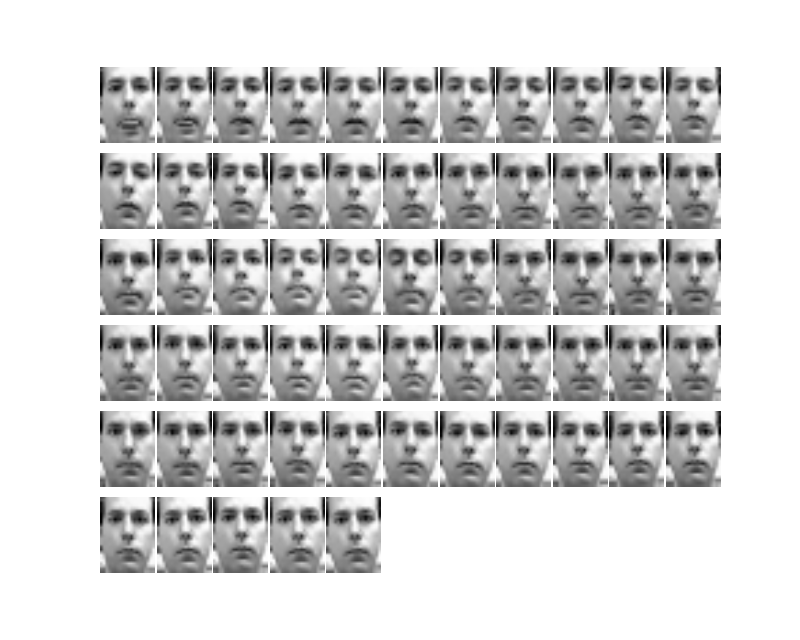

In [3]:
# Explore the data
df.showfreyface(X[:,0:60]) # Shows the images in the selected columns of the data matrix X (takes a few seconds)

<a id='pca'></a>
## Principle Component Analysis (PCA)
Apply PCA to find the eigendirections of the data

In [4]:
# Built-in PCA results
pca = decomp.PCA(n_components=min(X.shape))
pca.fit(X.T)
eigvec = pca.components_.T
eigval = pca.explained_variance_
print_n = 16
print('The first {} PCA eigenvalues are {}.\n').format(print_n, eigval[0:print_n])
# df.showfreyface(eigvec.T)

The first 16 PCA eigenvalues are [ 83568.355  51152.258  46398.877  32518.788  21471.147  14104.575
  13313.135  10247.04    9549.506   8707.889   7620.333   6967.501
   5885.475   5242.43    4668.648   4504.925].



### PCA implementation
* What's wrong with the code below, why does it give you different values? What do you notice about these values? How would you correct it? (The first line computes the eigendecomposition of $ XX^T $ )

In [5]:
# Wrong implementation
Dun,Vun = np.linalg.eig(np.dot(X,X.T)) # Get eigenvalues and eigenvectors of XX^T

order = Dun.argsort()[::-1] # Get the descending ordering of eigenvalues
Dun = Dun[order]
Vun = Vun[:,order]

print_n = 16;
print('The first {} incorrect PCA eigenvalues are {}.\n').format(print_n, Dun[0:print_n])

# df.showfreyface(Vun[:,0:16])

The first 16 incorrect PCA eigenvalues are [  2.767e+10   1.637e+08   1.005e+08   8.421e+07   5.763e+07   4.137e+07
   2.713e+07   2.610e+07   1.888e+07   1.876e+07   1.563e+07   1.394e+07
   1.355e+07   1.072e+07   1.021e+07   8.853e+06].



* Correct the code below to perform PCA on the data:

In [6]:
# Your implementation
## Write Code Here
Xctr = X

Dctr,Vctr = np.linalg.eig(np.dot(Xctr,Xctr.T)) # Get eigenvalues and eigenvectors of the data covariance matrix


## End Coding Here

order = Dctr.argsort()[::-1] # Get the descending ordering of eigenvalues
Dctr = Dctr[order]
Vctr = Vctr[:,order]

print_n = 16;
print('Compare your results to the correct eigenvalues.\n')
print('{} {}').format('Correct'.rjust(20), 'Yours'.rjust(20))
for i in range(print_n):
    print('{0:20.3f} {1:20.3f}').format(eigval[i], Dctr[i])

Compare your results to the correct eigenvalues.

             Correct                Yours
           83568.355      27666751980.469
           51152.258        163687656.170
           46398.877        100486241.226
           32518.788         84213389.415
           21471.147         57626636.361
           14104.575         41369750.768
           13313.135         27127430.101
           10247.040         26104691.502
            9549.506         18880150.504
            8707.889         18761358.719
            7620.333         15630513.254
            6967.501         13941102.051
            5885.475         13545953.951
            5242.430         10718198.660
            4668.648         10211957.603
            4504.925          8852701.586


<br><br><br>
### PCA eigenvectors
* Look at the top 16 eigenvectors in each case. Can you interpret them? How do they differ?

<IPython.core.display.Javascript object>


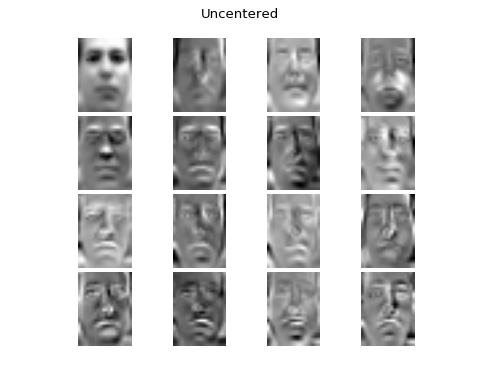

<IPython.core.display.Javascript object>


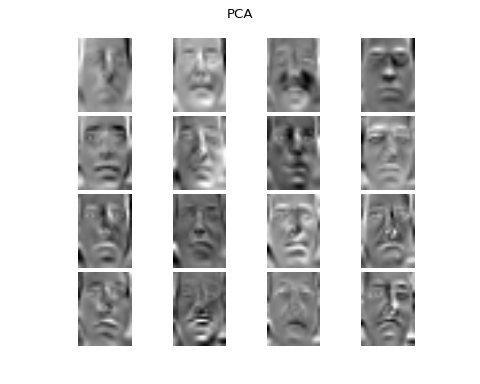

In [7]:
# Uncentered eigenvectors
df.showfreyface(Vun[:,0:16], ndims=[4,4], scale=0.6, figtitle='Uncentered')

#PCA eigenvectors
df.showfreyface(eigvec[:,0:16], ndims=[4,4], scale=0.6, figtitle='PCA')

<br><br><br>
* Project the data onto the top two eigenvectors, and plot the resulting 2D points. Clicking in the scatter plot will reconstruct the corresponding image on the right

<IPython.core.display.Javascript object>


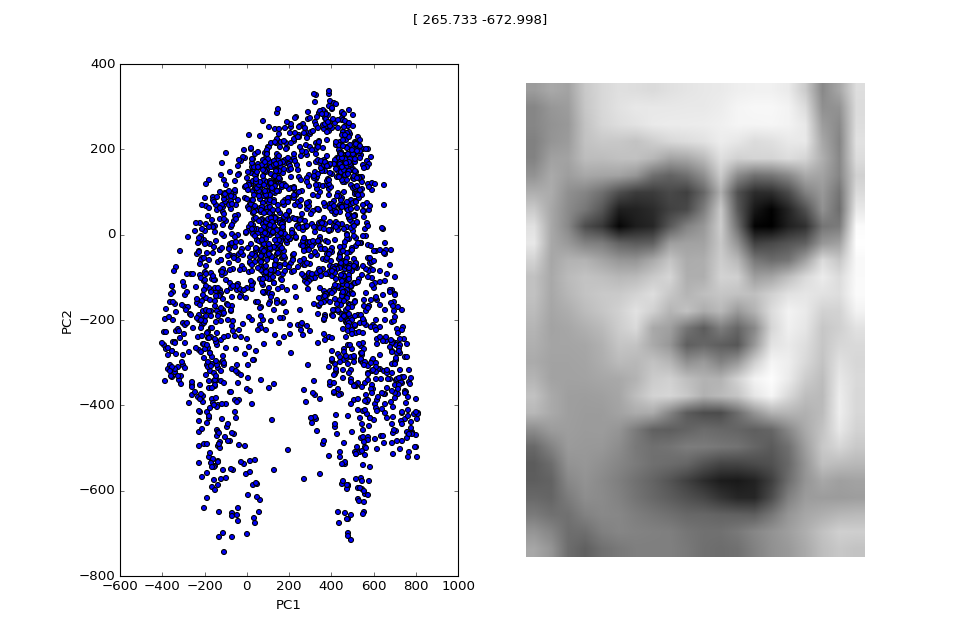

In [8]:
# Calculating data projection
Y = np.dot(eigvec[:,0:2].T, X)


# Visualization
matplotlib.rcParams['figure.figsize'] = (12,8)
fig = plt.figure();
ax2 = fig.add_subplot(122)
ax1 = fig.add_subplot(121)
plt.scatter(Y[0,:], Y[1,:])
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
Yhat = np.array([1,0])
Xhat = np.dot(eigvec[:,0:2], Yhat)
ax2.imshow((Xhat+X.mean(1)).reshape((28,20)), cmap='gray')
ax2.axis('off')
def onclick_pca(event):
    Yhat = np.array([event.xdata, event.ydata])
    Xhat = np.dot(eigvec[:,0:2], Yhat)
    ax2.imshow((Xhat+X.mean(1)).reshape((28,20)), cmap='gray')
    fig.suptitle(Yhat)
cid = fig.canvas.mpl_connect('button_press_event', onclick_pca)
plt.show()

 ### PCA eigenspectrum
 * Look at the eigenspectrum. What might be a good choice for k? Is it easy to tell?

<IPython.core.display.Javascript object>


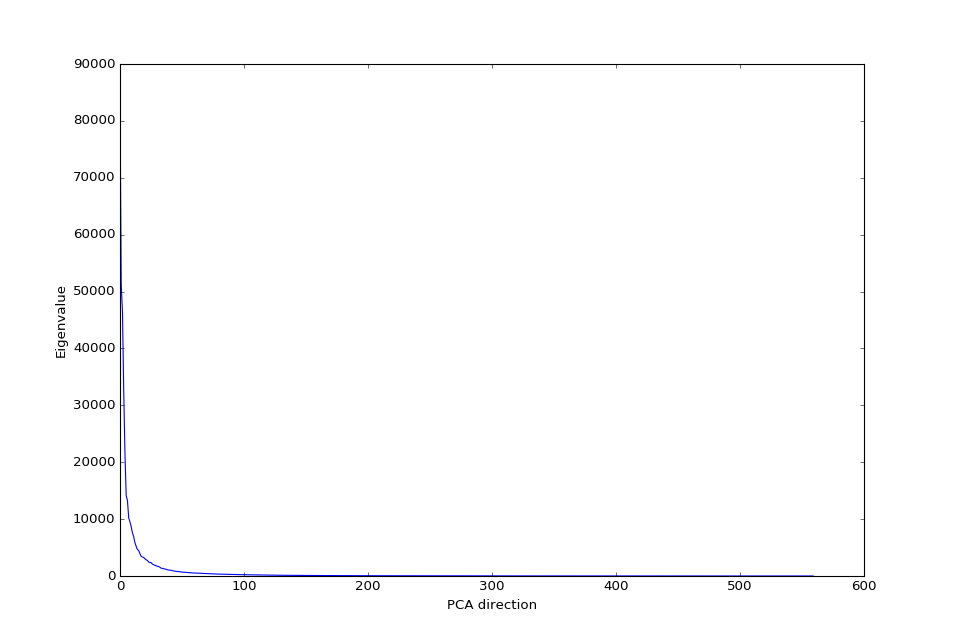

In [10]:
# Examine the resulting eigenvalues
plt.figure();
plt.plot(eigval)
plt.xlabel('PCA direction')
plt.ylabel('Eigenvalue')
plt.show()

<br><br><br>
* Another metric for choosing k is looking at the cumulative variance explained by the first k eigendirections. Is it easier to select k now?

<IPython.core.display.Javascript object>


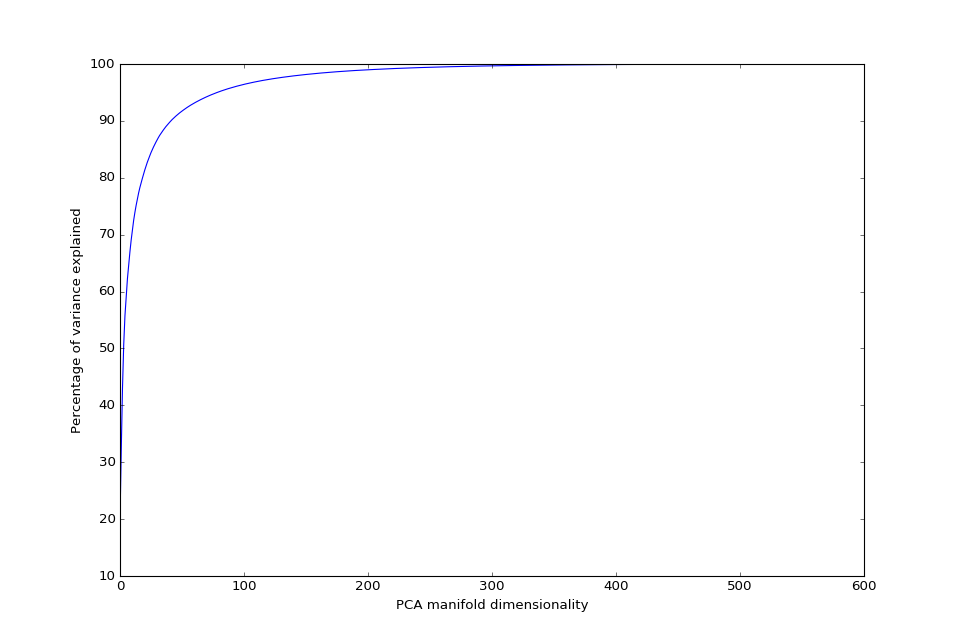

In [11]:
# Examine the resulting eigenvalues
plt.figure();
cum_explained = np.cumsum(eigval/np.sum(eigval))
plt.plot(cum_explained*100)
plt.xlabel('PCA manifold dimensionality')
plt.ylabel('Percentage of variance explained')
plt.show()

<br><br><br>
* To verify this latest metric, look at a set of random images generated using the first k eigenvectors, such that the linear subspace contains d % of the total variance. For which values do the images look most realistic?
    * Note that the simulated images are from a multivariate Gaussian with zero mean and variances according to the learned eigenvalues, whereas the true image distribution is usually non-normal (remember the scatter plot of the first 2 eigendirections)
* Why? 

Using    4 dimensions that explain at least  50% of the total variance


<IPython.core.display.Javascript object>


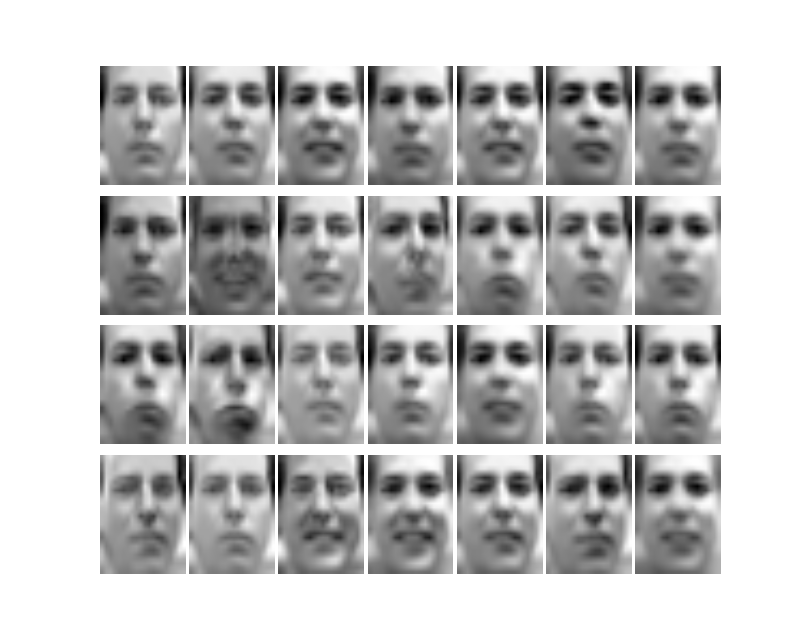

In [25]:
np.random.seed(2345)
d = 50; # Percentage of total variance explained (try 50, 70, 99)
k = np.argmax(cum_explained > (d/100.0))+1;
print('Using {0:4d} dimensions that explain at least {1:3d}% of the total variance').format(k,d)

#Drawing random samples from the correct Gaussian
num_samp = 28
Ysamp = np.random.multivariate_normal(np.zeros(k), np.diag(eigval[0:k]), num_samp).T
Xsamp = np.dot(eigvec[:,0:k], Ysamp)
# df.showfreyface(Xsamp)
df.showfreyface(Xsamp+X.mean(1)[:,np.newaxis])

<br><br><br>
### PCA for denoising.
* Try adding different levels of noise n to an image, projecting into the PCA manifold to find $y$, then computing the reconstruction $\hat{x}$
* For what combinations of k and n does the reconstruction look "good"?
* How does this relate to the total variance contained in the PCA manifold chosen?
* How would you define "noise floor"?

<IPython.core.display.Javascript object>


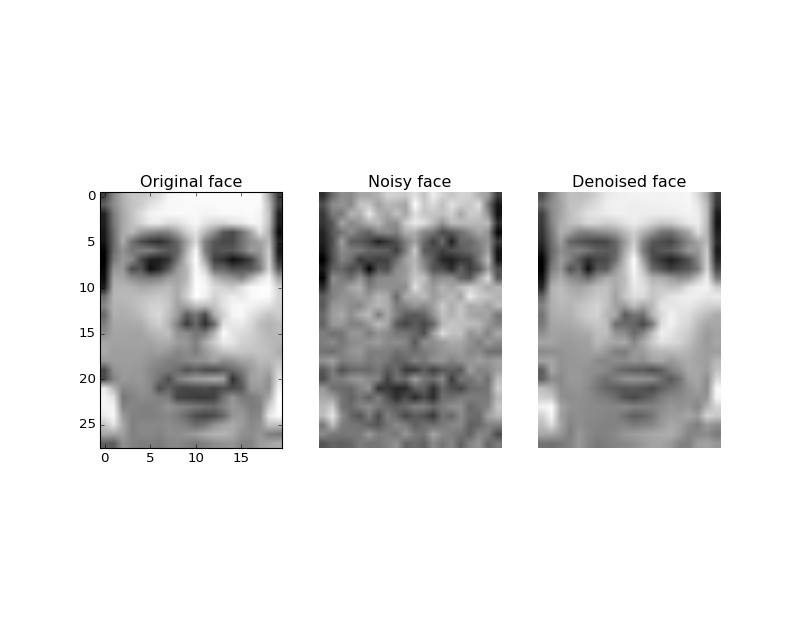

(-0.5, 19.5, 27.5, -0.5)

In [27]:
n = 0.1; # Noise level percentage (Try 0.01, 0.1, 1, 10, 50, 90) 
k = 100; # Try various values or try to "guess" the best one


# # Alternatively use the reconstruction level d. Is this optimal? Why?
# d = 100-n;
# k = np.argmax(cum_explained > (d/100.0))+1;
# print('Using {0:4d} dimensions that explain at least {1:3f}% of the total variance').format(k,d)


n = n / 100.0 * np.sum(eigval) # Converting noise percentage level into variances

# Creating a noise image
Xtrue = X[:,0] # Choose base image here
Xnoisy = Xtrue - X.mean(1) + np.random.multivariate_normal(np.zeros(Xtrue.shape[0]), np.diag(np.ones(Xtrue.shape[0])*n), 1)

Yhat = np.dot(eigvec[:,0:k].T, Xnoisy.T) # Projecting into the k-dimensional PCA manifold
Xhat = np.dot(eigvec[:,0:k], Yhat) # Reconstring the image from the PCA coefficients

# Plotting
fig = plt.figure();
ax0 = fig.add_subplot(131)
ax0.set_title('Original face')
ax1 = fig.add_subplot(132)
ax1.set_title('Noisy face')
ax2 = fig.add_subplot(133)
ax2.set_title('Denoised face')
ax0.imshow(Xtrue.reshape((28,20)), cmap='gray')
ax1.imshow((Xnoisy.T+X.mean(1)[:,np.newaxis]).reshape((28,20)), cmap='gray')
ax2.imshow((Xhat+X.mean(1)[:,np.newaxis]).reshape((28,20)), cmap='gray')
ax1.axis('off')
ax2.axis('off')


<br><br><br> <a id='mds'></a>
## Multidimensional scaling (MDS)
MDS looks at a different metric of the data, the pairwise similarities between samples. For numerical data (or at least extracted features) this corresponds to the inner product, or the Gram matrix $X^TX$. Note that in PCA we used the covariance or scatter matrix $XX^T$.


* Construct the Gram matrix after removing the mean of the data (use $X_{ctr}$)
* Use MDS to embed into a 2D space and plot the result (see PCA instructions above for help). Verify that you get the same result as PCA (there might well be sign differences).
* Look at the results of the first two singular vectors [using *np.linalg.svd()* ] . How do they correspond to the results of PCA and MDS?

In [28]:
# Using MDS
# Write code here





In [29]:
# Using SVD
# Write code here




<br>
* Time the three equivalent algorithms: PCA, MDS and SVD. Which is fastest? Explore how this depends on the number of data dimensions and on the number of data.

In [30]:
use_dims = 130 # How many dimensions of the data to use (max 560)
# (note that if you reduce it the images won't make sense anymore, this is purely for timing purposes)
use_samples = 30 # How many of the 1965 provided samples to use

In [31]:
Xctr = X - X.mean(axis=1)[:,np.newaxis]

#Timing PCA
print('Timing PCA: ')
%timeit np.linalg.eig(np.dot(Xctr[0:use_dims,0:use_samples],Xctr[0:use_dims,0:use_samples].T)/use_samples)
Dpca,Vpca = np.linalg.eig(np.dot(Xctr[0:use_dims,0:use_samples],Xctr[0:use_dims,0:use_samples].T)/use_samples)

#Timing MDS
print('Timing MDS: ')
%timeit np.linalg.eig(np.dot(Xctr[0:use_dims,0:use_samples].T, Xctr[0:use_dims,0:use_samples])/use_samples)
Dmds,Vmds = np.linalg.eig(np.dot(Xctr[0:use_dims,0:use_samples].T, Xctr[0:use_dims,0:use_samples])/use_samples)

#Timing SVD
print('Timing SVD: ')
%timeit np.linalg.svd(Xctr[0:use_dims,0:use_samples]/np.sqrt(use_samples))
Vsvd,Dsvd,tmp = np.linalg.svd(Xctr[0:use_dims,0:use_samples]/np.sqrt(use_samples))
    

Timing PCA: 
100 loops, best of 3: 8.2 ms per loop
Timing MDS: 
1000 loops, best of 3: 269 µs per loop
Timing SVD: 
1000 loops, best of 3: 918 µs per loop


In [32]:
# Check that the eigenvalues are the same (Note that either PCA or the MDS matrix may be badly conditioned, but not both!)
print(Dpca[0:16])
print(Dmds[0:16])
print(Dsvd[0:16]**2)

[ 31205.846+0.j  11679.699+0.j   7771.207+0.j   3982.993+0.j   2492.136+0.j
   2185.414+0.j   1103.909+0.j    988.753+0.j    624.631+0.j    306.137+0.j
    231.038+0.j    158.903+0.j    150.273+0.j    120.911+0.j     82.483+0.j
     69.485+0.j]
[ 31205.846  11679.699   7771.207   3982.993   2492.136   2185.414
   1103.909    988.753    624.631    306.137    231.038    158.903
    150.273    120.911     82.483     69.485]
[ 31205.846  11679.699   7771.207   3982.993   2492.136   2185.414
   1103.909    988.753    624.631    306.137    231.038    158.903
    150.273    120.911     82.483     69.485]


* Can you think of different metrics to try with MDS?

<br><br><br>
## Kernel PCA
* _[Advanced]_ Try replacing the inner products with squared-exponential (i.e. Gaussian) kernel evaluations. What do you think of these results?

In [ ]:
# Kernel PCA
# Write Code here



<br><br><br> <a id='lle'></a>
## Locally linear embedding (LLE)
LLE is a globally non-linear method that aims to preserve linearity within a certain neighbourhood of each data point

The 3 steps of the algorithm are:
1. Compute pairwise distances and find neighborhoods
2. Solve for reconstruction weights $W$ at each point
    * Regression from the neighbourhood
3. Compute embedding from the eigenvectors of the cost matrix $(I-W)^T(I-W)$

This same face data was used in the original LLE paper (Roweis & Saul, see lecture notes). 
* Can you reproduce the figure? (They used a 12-nearest-neighbour graph and 2 dimensions).
* Explore the resulting projection space. Does it make more or less sense than the PCA one?
* Experiment with the neighbourhood size. How does it affect the results? Which neighbourhood gives the most interpretable embedding?

In [ ]:
# Built-in
lle = manifold.LocallyLinearEmbedding(n_neighbors=12, n_components=2, reg=0, eigen_solver='dense', \
                                      max_iter=100000, method='standard', neighbors_algorithm='brute', \
                                      tol=1e-06)
Y = lle.fit_transform(X.T) # Computes the embedded face points

# # Custom written
# Y = df.custom_lle(X,n_neighbours=12, k=2, regularization=0)

In [ ]:
# Visualization
# Note that reconstruction from an arbitrary point using LLE is somewhat difficult, 
# for now we'll just find the nearest existing data point to the user's click

# Train a neighborhood object within the embedding space
Ynbrs = neighbors.NearestNeighbors(n_neighbors=1)
Ynbrs.fit(Y)

fig = plt.figure();
ax2 = fig.add_subplot(122)
ax1 = fig.add_subplot(121)
plt.scatter(Y[:,0], Y[:,1])
#ax1.set_title(('Local {}d embedding').format(lle.n_components))
ax2.axis('off')
def onclick_lle(event):
    Yhat = np.array([event.xdata, event.ydata])
    # Find nearest neighbour in embedding space
    Xhatind = Ynbrs.kneighbors(Yhat.T, 1, return_distance=False) # returns the index of the nearest neighbor
    Xhat = X[:,Xhatind[0]]
    ax2.imshow(Xhat.reshape((28,20)), cmap='gray')
    fig.suptitle(Yhat)
cid = fig.canvas.mpl_connect('button_press_event', onclick_lle)
plt.show()

<br><br><br>
* The code above always shows an existing sample, that is closest to the clicked point
* How would you modify the algorithm to reconstruct an arbitrary sample? Try below!
<br>


In [ ]:
# Built-in
lle = manifold.LocallyLinearEmbedding(n_neighbors=12, n_components=2, reg=1e-03, eigen_solver='dense', \
                                      max_iter=100000, method='standard', neighbors_algorithm='brute', \
                                      tol=1e-06)
Y = lle.fit_transform(X.T) # Computes the embedded face points

# Visualization

## Modify this code ----------------------------------------------------------------------------------

# Train a neighborhood object within the embedding space
Ynbrs = neighbors.NearestNeighbors(n_neighbors=1)
Ynbrs.fit(Y)

## End modifying code --------------------------------------------------------------------------------

fig = plt.figure();
ax2 = fig.add_subplot(122)
ax1 = fig.add_subplot(121)
plt.scatter(Y[:,0], Y[:,1])
ax1.set_title(('Local {}d embedding').format(lle.n_components))
ax2.axis('off')
def onclick_lle2(event):
    Yhat = np.array([event.xdata, event.ydata])
    ## Write code here ----------------------------------------------------------------------------------
    
    
    Xhat = np.zeros(Xhat.shape) # Change this line


    ## End code here (that sets the value of Xhat) ------------------------------------------------------
    ax2.imshow(Xhat.reshape((28,20)), cmap='gray')
    fig.suptitle(Yhat)
cid = fig.canvas.mpl_connect('button_press_event', onclick_lle2)
plt.show()

* *[Advanced]* How would you implement your own LLE algorithm?
    * Follow the steps outlined and use the lecture notes for the math

In [ ]:
# Your LLE
def my_lle(X, n_neighbours=12, k=2):
    #X: raw input data
    
    #Step 1 - For each point get the local neighbourhood based on pairwise distance measures
    # Input - data (features x samples) and n_neighbors. 
    # Output - local neighbourhood indices (n_neighbours x samples)
    
    
    
    #Step 2 - For each point solve reconstruction using it's neighbourhood as regressors
    # Input - data,  neighbourhoods. 
    # Output - local reconstruction weights W (n_neighbours x samples)
    
    
    #Step 3 - Compute the best k-dimensional embedding Y by solving the quadratic cost function
    # Input - W
    # Output - Y (k x samples)
    # Note that you do not get "projection vectors" as in PCA, only the projected data
    # This is due to the fact that globally this method is non-linear.
    
    # This step is somewhat tricky
    
    return

<br><br><br> <a id='isomap'></a>
## Isomap
Isomap is a globally non-linear method that aims to preserve distances between samples in a graph-path sense

The 3 steps of the algorithm are:
1. Compute pairwise distances (euclidean) and find neighborhoods
2. Recompute pairwise distances using shortest path in graph
3. Compute embedding using metric MDS

The Isomap paper (Tenenbaum et al.) used a different face data set. Try running it on Brendan and compare to LLE. 
* Again, how does the neighbourhood affect the results?
* Can you reconstruct in this case?

In [ ]:
# Built-in
isomap = manifold.Isomap(n_neighbors=12, n_components=2, eigen_solver='dense', tol=0, \
                         max_iter=None, path_method='FW', neighbors_algorithm='brute')
Y = isomap.fit_transform(X.T) # Computes the embedded face points

# Visualization
# Note that reconstruction from an arbitrary point using LLE is somewhat difficult, 
# for now we'll just find the nearest existing data point to the user's click

# Train a neighborhood object within the embedding space
Ynbrs = neighbors.NearestNeighbors(n_neighbors=1)
Ynbrs.fit(Y)

fig = plt.figure();
ax2 = fig.add_subplot(122)
ax1 = fig.add_subplot(121)
plt.scatter(Y[:,0], Y[:,1])
ax1.set_title(('Local {}d embedding').format(lle.n_components))
ax2.axis('off')
def onclick_isomap(event):
    Yhat = np.array([event.xdata, event.ydata])
    # Find nearest neighbour in embedding space
    Xhatind = Ynbrs.kneighbors(Yhat.T, 1, return_distance=False) # returns the index of the nearest neighbor
    Xhat = X[:,Xhatind[0]]
    ax2.imshow(Xhat.reshape((28,20)), cmap='gray')
    fig.suptitle(Yhat)
cid = fig.canvas.mpl_connect('button_press_event', onclick_isomap)
plt.show()

<br><br><br>
* *[Advanced]* Try your own implementation of isomap (notice that you can reuse code from lle)

In [ ]:
# Your Isomap
def my_isomap(X, n_neighbours=12, k=2):
    # Implement the 3 steps of isomap
    
    return

<br><br><br>
<a id="further"></a>
# Further algorithms

It is very much recommended that whenever you plan to use dimensionality reduction during your research, you dig into it and implement your own version. As you could see above, most of these algorithms are actually quite simple and can be implemented in a few lines of code, if you understand the linear algebra going on in the background.

<br>
## Independent Component Analysis (ICA)
ICA is not a classical dimensionality reduction method, rather a linear combination representation of the data. It often actually increases the dimensionality of our data, but such that each of the axis is meaningful in some sense 

(We'd like to refer to meaningful in the human sense, but we need to somehow translate human meaning into math. We can do this in multiple ways. One way is to assume basis vectors are sparse - meaning they only put weight in a few places, resulting in more interpretable features. Adding further constraint [such as explicitly local features instead of just sparse] result in even more interpretability, but way more complicated algorithms to write).

Look at our favourite Frey dataset in this sense now, and locate the eyebrow feature :-)

In [ ]:
ica = decomp.FastICA(n_components=100, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, \
                     max_iter=200, tol=0.0001, w_init=None, random_state=None)
ica.fit(X.T)

In [ ]:
icavec = ica.components_.T
df.showfreyface(icavec)

<br><br>
## Maximum Variance Unfolding
Using the same neighbourhood graph as LLE and Isomap, but locally tries to preserve variance like PCA instead of reconstructability (LLE) or graph distance (Isomap).

* *[Very Advanced]* Add an option to your custom LLE algorithm such that it preserves all local distances in the neighborhoods instead of the reconstructability

In [ ]:
# No built-in version yet
# Implement my_lle(..., mvu=true)



<br><br>
## Stochastic Neighbour Embedding (SNE)
The previous neighbourhood-preserving algorithms (LLE, Isomap, MVU) always used the same "hard"-neighbourhoods (either two samples are neighbours or not). Here we "soften" this algorithm and instead use a probability that two points are neighbours.

In [ ]:
tsne = manifold.TSNE(n_components=2, perplexity=30.0, early_exaggeration=4.0, learning_rate=1000.0, \
                     n_iter=1000, n_iter_without_progress=30, min_grad_norm=1e-07, metric='euclidean', \
                     init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5)
Y = tsne.fit_transform(X.T)

In [ ]:
# Visualization
# Note that reconstruction from an arbitrary point using LLE is somewhat difficult, 
# for now we'll just find the nearest existing data point to the user's click

# Train a neighborhood object within the embedding space
Ynbrs = neighbors.NearestNeighbors(n_neighbors=1)
Ynbrs.fit(Y)

fig = plt.figure();
ax2 = fig.add_subplot(122)
ax1 = fig.add_subplot(121)
plt.scatter(Y[:,0], Y[:,1])
#ax1.set_title(('Local {}d embedding').format(lle.n_components))
ax2.axis('off')
def onclick_sne(event):
    Yhat = np.array([event.xdata, event.ydata])
    # Find nearest neighbour in embedding space
    Xhatind = Ynbrs.kneighbors(Yhat.T, 1, return_distance=False) # returns the index of the nearest neighbor
    Xhat = X[:,Xhatind[0]]
    ax2.imshow(Xhat.reshape((28,20)), cmap='gray')
    fig.suptitle(Yhat)
cid = fig.canvas.mpl_connect('button_press_event', onclick_sne)
plt.show()

<br><br><br>
<a id='yours'></a>
# Try your own data and algorithms

There are lots of datasets available online:
* ETH unsupervised challange - http://www.causality.inf.ethz.ch/unsupervised-learning.php?page=datasets
* SKlearn dataset tools - "from sklearn import datasets", http://scikit-learn.org/stable/datasets/
* Kaggle: https://www.kaggle.com/datasets

Toolboxes (Python):
* Scikit-learn (ML toolbox that we used here a lot): http://scikit-learn.org/
* Pandas (Data analysis toolbox (less machine learning)): http://pandas.pydata.org/
* Numpy and Scipy (linear algebra, signal processing etc, Write your own custom algorithms in these): https://www.scipy.org/

Toolbox (C++, with Python interface):
* SHOGUN Machine Learning (fast and flexible toolbox): http://www.shogun-toolbox.org/
* Eigen (amazing linear algebra toolbox): http://eigen.tuxfamily.org/

